In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import json

def get_article_links(url):
    article_links = []
    page_num = 1
    while True:
        page_url = f"{url}/page/{page_num}/"
        response = requests.get(page_url)
        if response.status_code != 200:
            break
        html_content = response.content
        soup = BeautifulSoup(html_content, "html.parser")
        for link in soup.find_all('a', class_='entry-title-link'):
            article_links.append(link['href'])
        page_num += 1
    return article_links

def get_article_dates(links):
    date_links = {}
    counter = 0 # initialize counter variable
    for link in links:
        try:
            response = requests.get(link)
        except requests.exceptions.ConnectionError:
            print(f"Error: Connection refused for {link}")
            continue
        html_content = response.content
        soup = BeautifulSoup(html_content, "html.parser")
        date_tag = soup.find('time', class_='entry-time')
        if not date_tag:
            continue
        date = date_tag.text.strip()
        try:
            formatted_date = datetime.strptime(date, '%B %d, %Y').strftime('%Y_%m_%d')
        except ValueError:
            continue
        print(f"{formatted_date}: {link}")
        if formatted_date in date_links:
            date_links[formatted_date].append(link)
        else:
            date_links[formatted_date] = [link]
        counter += 1 # increment the counter variable
        print(counter)
    
    return date_links # return the dictionary of dates and links




In [27]:
import json

# Get article links
article_links = get_article_links('https://thehoya.com/category/news/')

# Get article dates
article_dates = get_article_dates(article_links)

# Save data to a JSON file
with open('georgetown_article_pages.json', 'w') as f:
    json.dump(article_dates, f, indent=4)

# Print the data to check if it is correctly saved in the JSON file
with open('georgetown_article_pages.json', 'r') as f:
    data = json.load(f)
    print(data)

2023_05_03: https://thehoya.com/the-hoya-staff-named-news-winner-finalists-in-bunn-awards/
1
2023_04_29: https://thehoya.com/hoya-harvest-garden-launches-at-breaking-ground-festival/
2
2023_04_29: https://thehoya.com/four-women-faculty-elected-to-elite-academic-society/
3
2023_04_29: https://thehoya.com/two-georgetown-students-named-2023-goldwater-scholars/
4
2023_04_29: https://thehoya.com/georgetown-hires-new-associate-director-for-lgbtq-resource-center/
5
2023_04_29: https://thehoya.com/hfc-bossier-host-open-mic-night/
6
2023_04_29: https://thehoya.com/cisa-partners-with-smithsonian-views-tribal-artifacts/
7
2023_04_29: https://thehoya.com/religious-leaders-discuss-expanding-roles-for-women-in-the-catholic-church/
8
2023_04_29: https://thehoya.com/tedxgeorgetown-hosts-seasons-for-change-conference/
9
2023_04_29: https://thehoya.com/volunteers-clean-anacostia-watershed/
10
2023_04_29: https://thehoya.com/faces-of-climate-change-exhibition-raises-awareness-of-climate-crisis/
11
2023_0

In [29]:
from helpers.txt_to_text import get_article_text
from helpers.make_txt_entry import make_txt_entry
import os
import json

with open('georgetown_article_pages.json', 'r') as f:
    data = json.load(f)

school_name = "Georgetown"
dates = sorted(data.keys())

for date in reversed(dates):
    articles = data[date]
    file_path = "journal_data/txt/"+school_name.replace(" ","_")+"/"+date+".txt"
    if(os.path.exists(file_path)):
        print(f"Date {date} already added.")
    else:
        article_text = ""
        for article in articles:
            article_text += get_article_text(article) + "\n"
            
        make_txt_entry(school_name="Georgetown", publication_date=date, text=article_text)
        print(f"Date {date} added.")


Date 2023_05_03 already added.
Date 2023_04_29 already added.
Date 2023_04_22 already added.
Date 2023_04_21 already added.
Date 2023_04_17 already added.
Date 2023_04_16 already added.
Date 2023_04_15 already added.
Date 2023_04_14 already added.
Date 2023_04_13 already added.
Date 2023_04_02 already added.
Date 2023_04_01 already added.
Date 2023_03_31 already added.
Date 2023_03_27 already added.
Date 2023_03_26 already added.
Date 2023_03_25 already added.
Date 2023_03_24 already added.
Date 2023_03_19 already added.
Date 2023_03_18 already added.
Date 2023_03_17 already added.
Date 2023_03_16 already added.
Date 2023_03_08 already added.
Date 2023_03_07 already added.
Date 2023_03_04 already added.
Date 2023_03_03 already added.
Date 2023_02_26 already added.
Date 2023_02_25 already added.
Date 2023_02_24 already added.
Date 2023_02_11 already added.
Date 2023_02_10 already added.
Date 2023_02_09 already added.
Date 2023_02_06 already added.
Date 2023_02_05 already added.
Date 202

grouped_data/csv/Georgetown_Antisemitism.csv created.
grouped_data/pkl/monthly/Georgetown_Antisemitism.pkl being created.


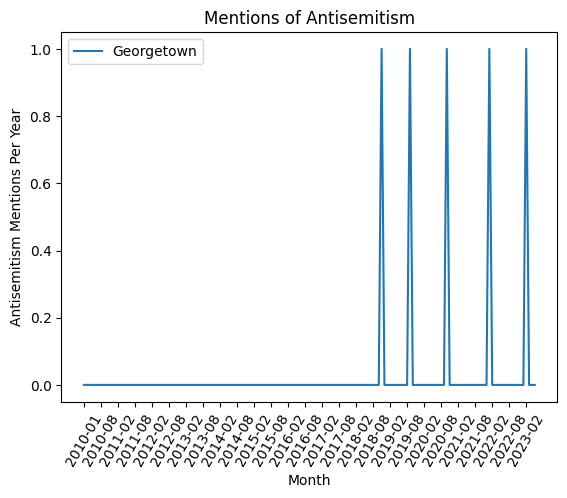

In [38]:
# Hyperparameters to Modify
school_name = 'Georgetown'
string = "Antisemitism"
time_slice = 'monthly'

from helpers.graphers import grapher
from helpers.queries import count_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        title=f"Mentions of {string}",
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")

grouped_data/csv/Georgetown_Count.csv created.
grouped_data/pkl/yearly/Georgetown_Count.pkl being created.


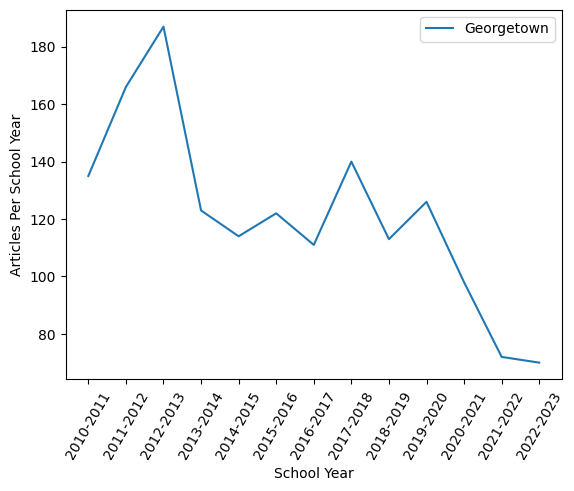

In [39]:
# Hyperparameters to Modify
school_name = 'Georgetown'
time_slice = 'yearly'

from helpers.graphers import grapher
from helpers.queries import one_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+'Count'
grapher(school_names=school_names,
        pipeline=[],
        query=one_query,
        y_label=f"Articles Per School Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")